In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import pandas as pd
import seaborn as sns

from data import Data
from brutforce import Brutforce
from visualizer import Visualizer
from average_approximation import AverageApproximation
from gurobi_reduced import GurobiSolverReduced

In [37]:
import matplotlib.pyplot as plt

def evaluate_solver_performance(data):
    bruteforce = Brutforce(data)
    sol_brute = bruteforce.solve()

    bruteforce = AverageApproximation(data)
    sol_average = bruteforce.solve()

    return sol_brute[0] / sol_average[0]

In [38]:
results = {}
repeats = 10
timesteps = [30]
teams = [4, 6, 8]

for repeat in range(repeats):
        for T in timesteps:
            for team in teams:
                print(repeat, T, team)

                data = Data(T=T, num_bells=5, num_teams=team, seed=repeat)

                results[(repeat, T, team)] = evaluate_solver_performance(data)


0 30 4
0 30 6
0 30 8
1 30 4
1 30 6
1 30 8
2 30 4
2 30 6
2 30 8
3 30 4
3 30 6
3 30 8
4 30 4
4 30 6
4 30 8
5 30 4
5 30 6
5 30 8
6 30 4
6 30 6
6 30 8
7 30 4
7 30 6
7 30 8
8 30 4
8 30 6
8 30 8
9 30 4
9 30 6
9 30 8


In [39]:
df1 = pd.DataFrame(
        [
            [*keys] + [result]
            for keys, result in results.items()
        ],
        columns=["repeat", "T", "teams", "ratio"],
    )

In [40]:
df1[:10]

,repeat,T,teams,ratio
0,0,30,4,1.103448
1,0,30,6,1.090909
2,0,30,8,1.096774
3,1,30,4,1.229730
4,1,30,6,1.166667
5,1,30,8,1.064748
6,2,30,4,1.230769
7,2,30,6,1.096154
8,2,30,8,1.111111
9,3,30,4,1.062500


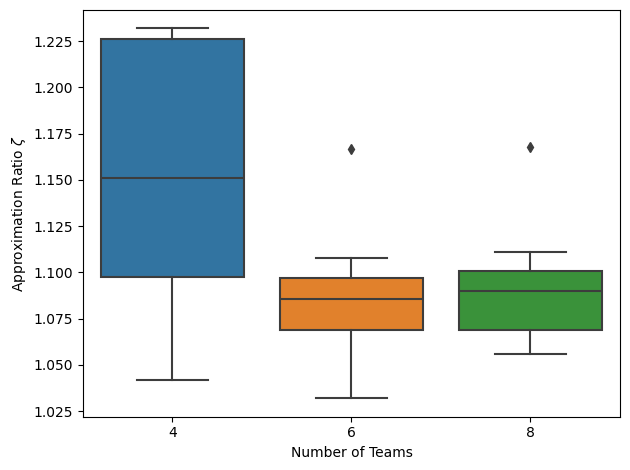

In [41]:
plot = sns.boxplot(df1, x="teams", y="ratio")

plot.set_xlabel("Number of Teams")
plot.set_ylabel("Approximation Ratio $\zeta$")

plt.tight_layout()

plt.savefig("approximation_simple.png", dpi=300)

In [42]:
results = {}
repeats = 10
timesteps = [30]
teams = [5]
bells = [3, 4, 5, 6, 7, 8]

for repeat in range(repeats):
        for T in timesteps:
            for team in teams:
                for bell in bells:
                    print(repeat, T, team, bell)

                    data = Data(T=T, num_bells=bell, num_teams=team, seed=repeat, team_limit=10)

                    results[(repeat, T, team, bell)] = evaluate_solver_performance(data)


0 30 5 3
0 30 5 4
0 30 5 5
0 30 5 6
0 30 5 7
0 30 5 8
1 30 5 3
1 30 5 4
1 30 5 5
1 30 5 6
1 30 5 7
1 30 5 8
2 30 5 3
2 30 5 4
2 30 5 5
2 30 5 6
2 30 5 7
2 30 5 8
3 30 5 3
3 30 5 4
3 30 5 5
3 30 5 6
3 30 5 7
3 30 5 8
4 30 5 3
4 30 5 4
4 30 5 5
4 30 5 6
4 30 5 7
4 30 5 8
5 30 5 3
5 30 5 4
5 30 5 5
5 30 5 6
5 30 5 7
5 30 5 8
6 30 5 3
6 30 5 4
6 30 5 5
6 30 5 6
6 30 5 7
6 30 5 8
7 30 5 3
7 30 5 4
7 30 5 5
7 30 5 6
7 30 5 7
7 30 5 8
8 30 5 3
8 30 5 4
8 30 5 5
8 30 5 6
8 30 5 7
8 30 5 8
9 30 5 3
9 30 5 4
9 30 5 5
9 30 5 6
9 30 5 7
9 30 5 8


In [43]:
df2 = pd.DataFrame(
        [
            [*keys] + [result]
            for keys, result in results.items()
        ],
        columns=["repeat", "T", "teams", "bells", "ratio"],
    )

In [44]:
df2[:10]

,repeat,T,teams,bells,ratio
0,0,30,5,3,1.000000
1,0,30,5,4,1.072289
2,0,30,5,5,1.126437
3,0,30,5,6,1.088235
4,0,30,5,7,1.188889
5,0,30,5,8,1.138889
6,1,30,5,3,1.097561
7,1,30,5,4,1.152941
8,1,30,5,5,1.070707
9,1,30,5,6,1.072072


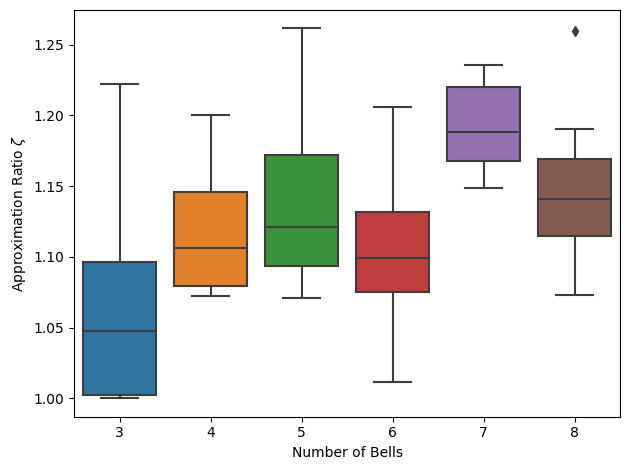

In [45]:
plot = sns.boxplot(df2, x="bells", y="ratio")

plot.set_xlabel("Number of Bells")
plot.set_ylabel("Approximation Ratio $\zeta$")

plt.tight_layout()

plt.savefig("approximation_simple.png", dpi=300)

In [46]:
repeats = 10
timesteps = [5, 10, 15, 20, 25, 30]
teams = [5]
bells = [5]

for repeat in range(repeats):
        for T in timesteps:
            for team in teams:
                for bell in bells:
                    print(repeat, T, team, bell)

                    data = Data(T=T, num_bells=bell, num_teams=team, seed=repeat, team_limit=10)

                    results[(repeat, T, team, bell)] = evaluate_solver_performance(data)


0 5 5 5
0 10 5 5
0 15 5 5
0 20 5 5
0 25 5 5
0 30 5 5
1 5 5 5
1 10 5 5
1 15 5 5
1 20 5 5
1 25 5 5
1 30 5 5
2 5 5 5
2 10 5 5
2 15 5 5
2 20 5 5
2 25 5 5
2 30 5 5
3 5 5 5
3 10 5 5
3 15 5 5
3 20 5 5
3 25 5 5
3 30 5 5
4 5 5 5
4 10 5 5
4 15 5 5
4 20 5 5
4 25 5 5
4 30 5 5
5 5 5 5
5 10 5 5
5 15 5 5
5 20 5 5
5 25 5 5
5 30 5 5
6 5 5 5
6 10 5 5
6 15 5 5
6 20 5 5
6 25 5 5
6 30 5 5
7 5 5 5
7 10 5 5
7 15 5 5
7 20 5 5
7 25 5 5
7 30 5 5
8 5 5 5
8 10 5 5
8 15 5 5
8 20 5 5
8 25 5 5
8 30 5 5
9 5 5 5
9 10 5 5
9 15 5 5
9 20 5 5
9 25 5 5
9 30 5 5


In [47]:
df3 = pd.DataFrame(
        [
            [*keys] + [result]
            for keys, result in results.items()
        ],
        columns=["repeat", "T", "teams", "bells", "ratio"],
    )

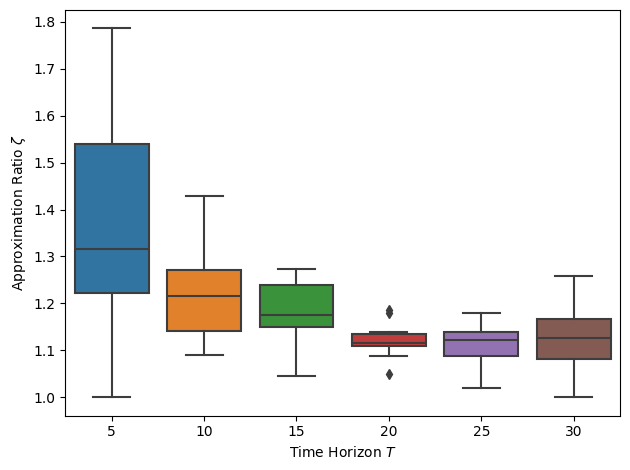

In [48]:
plot = sns.boxplot(df3, x="T", y="ratio")

plot.set_xlabel("Time Horizon $T$")
plot.set_ylabel("Approximation Ratio $\zeta$")

plt.tight_layout()

plt.savefig("approximation_simple.png", dpi=300)

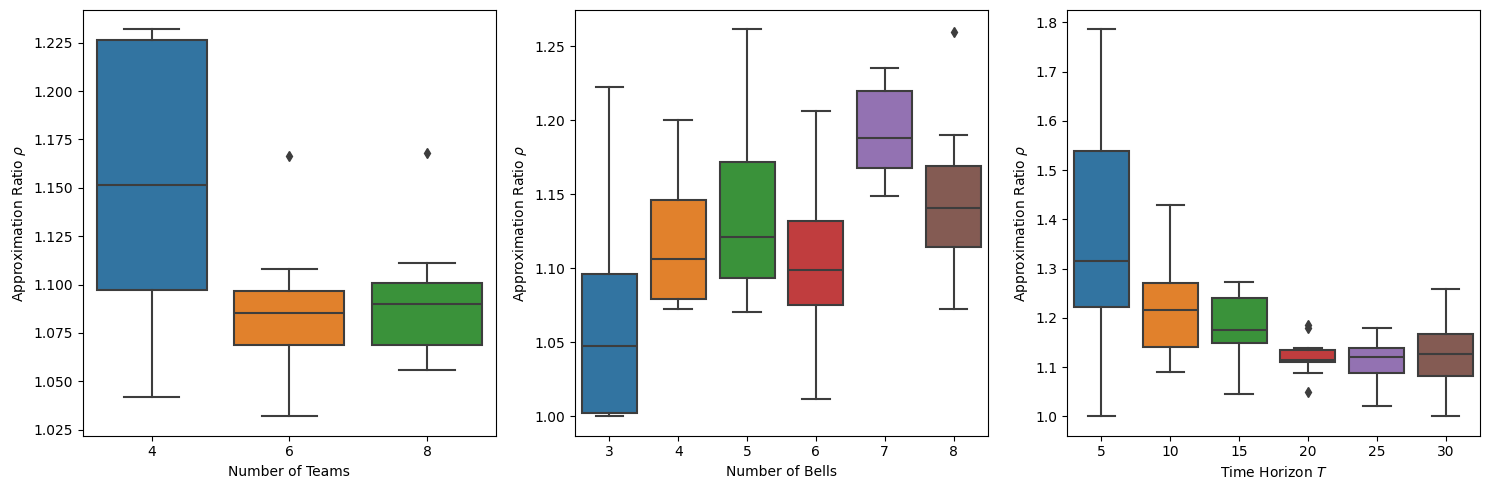

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot = sns.boxplot(df1, x="teams", y="ratio", ax=axes[0])

plot.set_xlabel("Number of Teams")
plot.set_ylabel("Approximation Ratio $\\rho$")

plot = sns.boxplot(df2, x="bells", y="ratio", ax=axes[1])

plot.set_xlabel("Number of Bells")
plot.set_ylabel("Approximation Ratio $\\rho$")

plot = sns.boxplot(df3, x="T", y="ratio")

plot.set_xlabel("Time Horizon $T$")
plot.set_ylabel("Approximation Ratio $\\rho$")

plt.tight_layout()

plt.savefig("approximation_periodic.pdf", dpi=300)